# CAR PRICE PREDICTION CASE STUDY

# Problem Statement

A Chinese automobile company Teclov_chinese aspires to enter the US
market by setting up their manufacturing unit there and producing cars
locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand
the factors on which the pricing of cars depends. Specifically, they want to
understand the factors affecting the pricing of cars in the American market,
since those may be very different from the Chinese market. Essentially, the
company wants to know:
1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.




# Business Goal
You are required to model the price of cars with the available independent
variables. It will be used by the management to understand how exactly
the prices vary with the independent variables. They can accordingly
manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

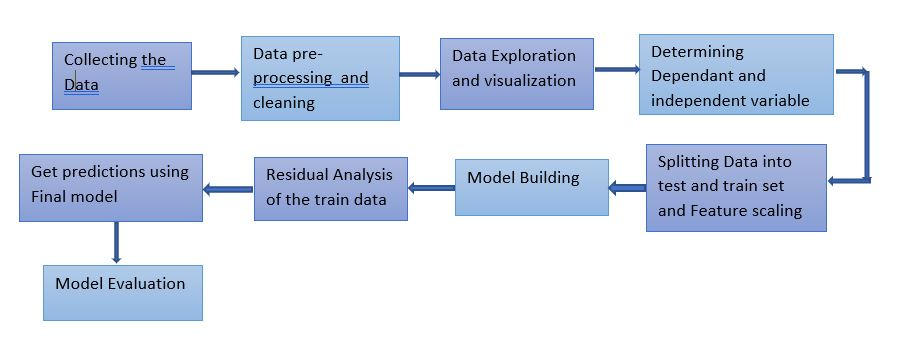

 # Reading and Understanding data

In [1]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')
#importing libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
carprice=pd.read_csv("F:/teclov/Assignment-6(EveningBatch)/Assignment-6(EveningBatch)/CarPrice Data.csv")

In [3]:
carprice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
carprice.shape

(205, 26)

In [5]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Cleaning and Preparation

In [7]:
#Splitting company name and model from CarName column
carprice[['CompanyName','model']] = carprice['CarName'].str.split(' ', n=1, expand=True)
carprice.drop(['CarName'], axis = 1, inplace = True)

In [8]:
# Checking for unique variables
carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)


There are few spelling mistakes in the car company names so let us now correct them.


In [9]:
carprice.CompanyName = carprice.CompanyName.str.lower()

def replace_name(a,b):
    carprice.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#Checking for duplicates any present
carprice.loc[carprice.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,model


In [11]:
carprice.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CompanyName', 'model'],
      dtype='object')

#  Visualizing the data

Visualizing data helps us to:

find any multicollinearity going on.
Identify if some predictors directly have a strong association with the outcome variable

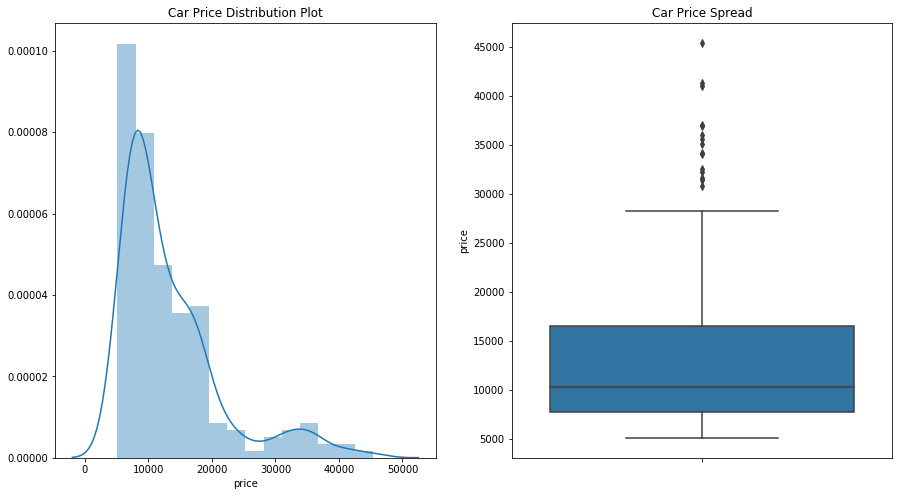

In [12]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(carprice.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=carprice.price)

plt.show()

In [13]:
print(carprice.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Observation:
The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

# Visualising Categorical Data
- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

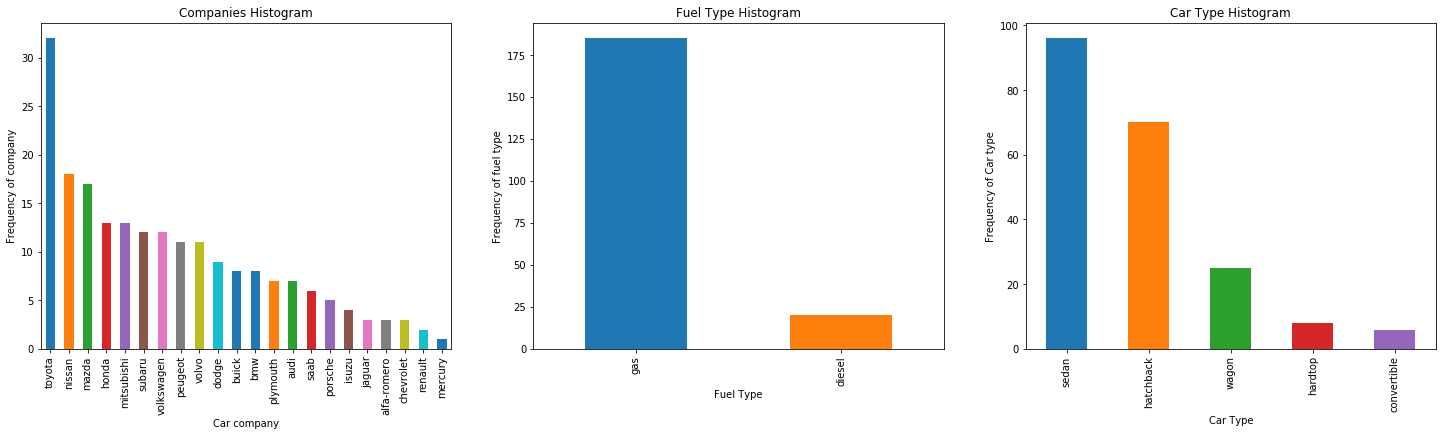

In [14]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = carprice.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = carprice.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = carprice.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Observation: By observing histogram plot we can notice that:
- Toyota seemed to be most favored car company.
- Number of gas fueled cars are more than diesel ones.
- More Prefered Car type is Sedan.

Let us now plot a boxplot of companies and its car prices.


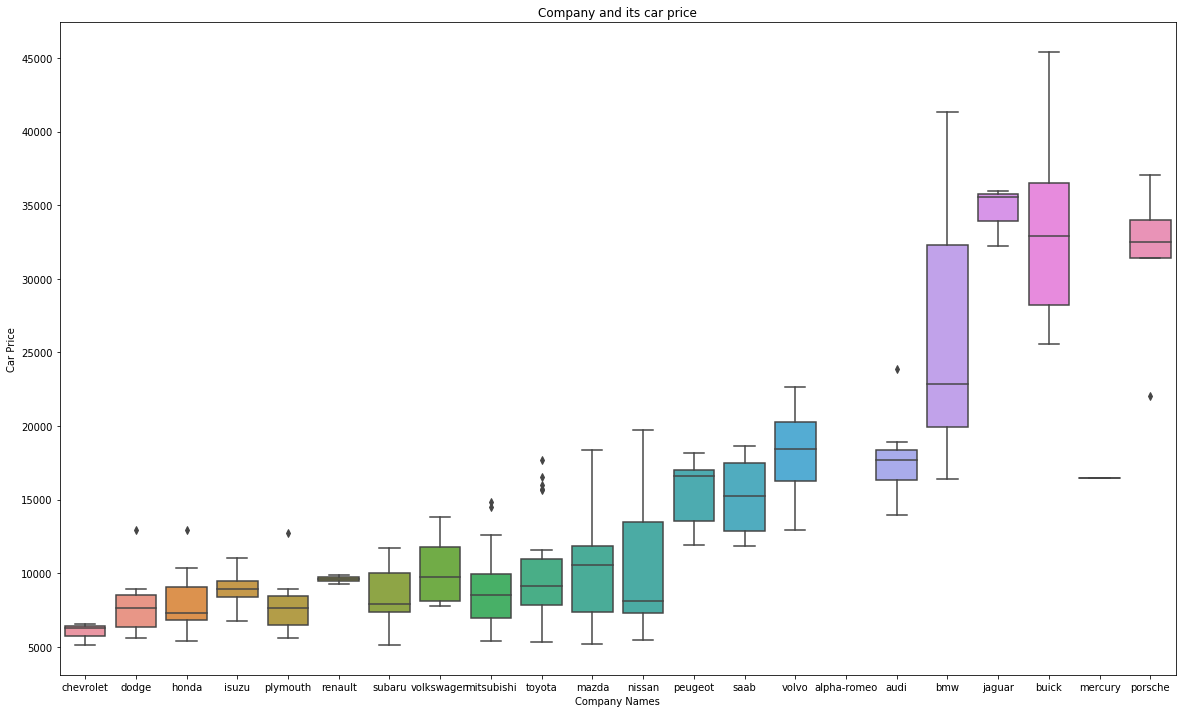

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(111)
plt.title('Company and its car price')
sns.boxplot(x = 'CompanyName', y = 'price', data = carprice, order=['chevrolet', 'dodge', 'honda', 'isuzu', 'plymouth', 'renault', 'subaru', 'volkswagen', 'mitsubishi', 'toyota', 'mazda', 'nissan', 'peugeot', 'saab', 'volvo', 'alpha-romeo', 'audi', 'bmw', 'jaguar', 'buick', 'mercury', 'porsche']).set(xlabel="Company Names", ylabel="Car Price")
plt.show()

Ploting a box plot for categorical variables as the boxplot displays high, low and median car prices and also, the number of cars which fall in that category. 

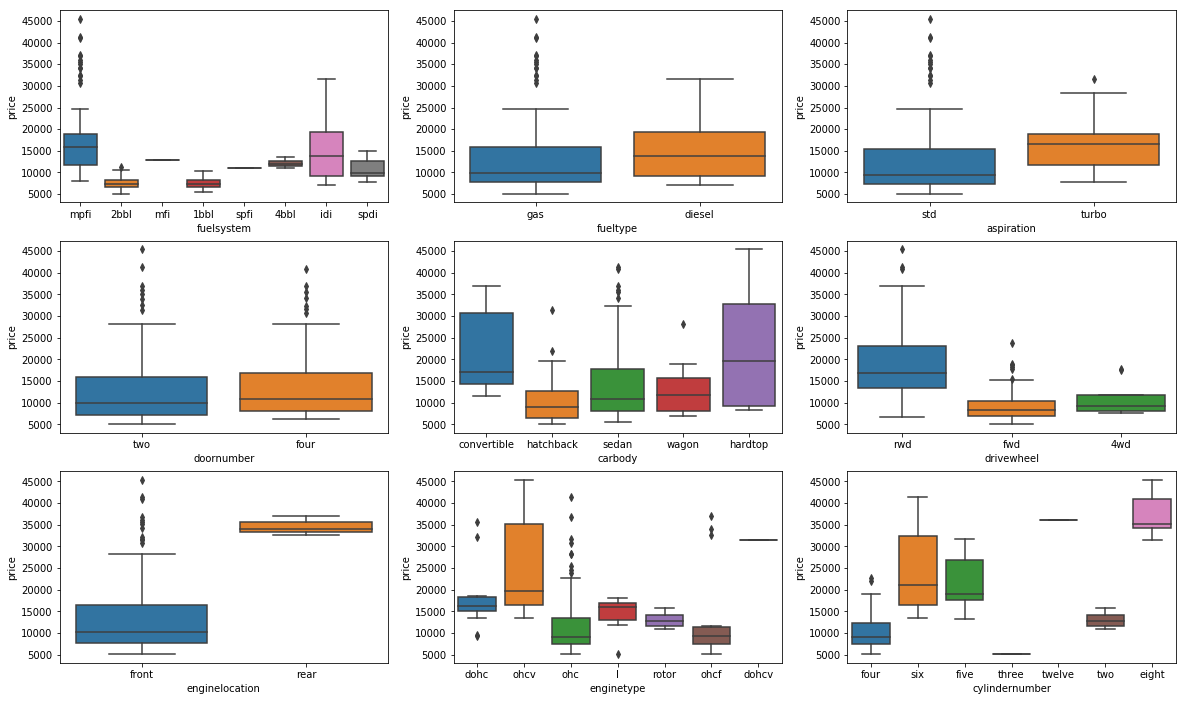

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(3,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(3,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.show()

# Detailed Analysis of each Categorical Variable


Considering each categorical variable separately and ploting a boxplot and a barplot so as to get rate of impact of the categorical variable on the price of the car.

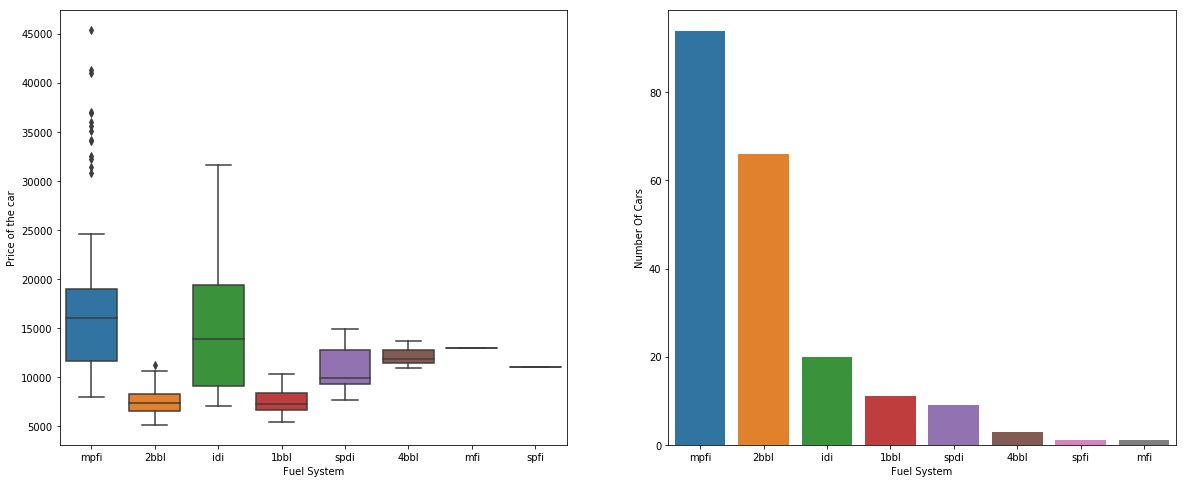

In [17]:
plt.figure(figsize=(20, 8))

# Fuel System
plt.subplot(121)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice, order=['mpfi', '2bbl', 'idi', '1bbl', 'spdi', '4bbl', 'mfi', 'spfi']).set(xlabel="Fuel System", ylabel="Price of the car")

plt.subplot(122)
df = carprice['fuelsystem'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Fuel System", ylabel="Number Of Cars")

plt.show()

From the above plots we observe that the fuel types mpfi and 2bbl have an average impact on the price of the cars than any other fuel system.

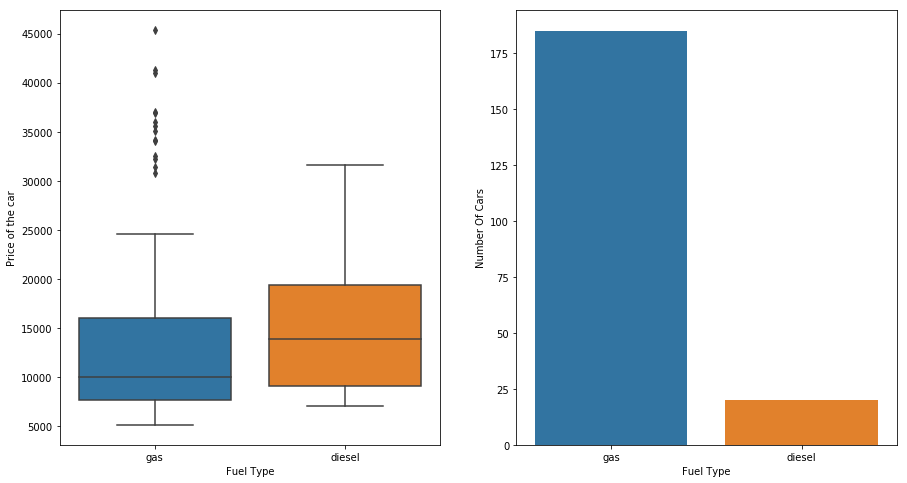

In [18]:
# Doing Analysis for Fuel type variable
plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="Price of the car")

plt.subplot(122)
df = carprice['fueltype'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Fuel Type", ylabel="Number Of Cars")

plt.show()

Analysis for Fuel Type variable:
We can see that the median price of the Diesel cars is slightly higher than the Gas cars and also, the demand of diesel cars seems very low. 

From above plot it does not seem to have a substantial relationship with the price of the car. And therefore dummy variable is required which describes the relationship with price better than Fuel Type variable.

Dummy variables required are

Gas (with values 1 and 0. 1 indicating Gas and 0 indicating Diesel)

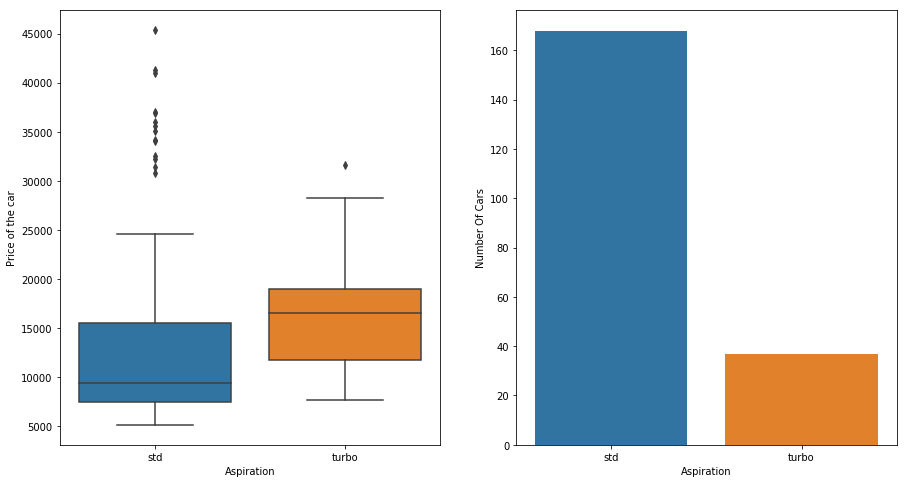

In [19]:
# Analysis for Aspiration 

plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice, order=['std', 'turbo']).set(xlabel="Aspiration", ylabel="Price of the car")

plt.subplot(122)
df = carprice['aspiration'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Aspiration", ylabel="Number Of Cars")

plt.show()

Analysis for Aspiration variable:
Here we can see that the median price of Turbo aspirent cars is significantly higher than price of Standard aspirant cars.

Hence, Aspiration is a significant feature impacting the price of the cars.

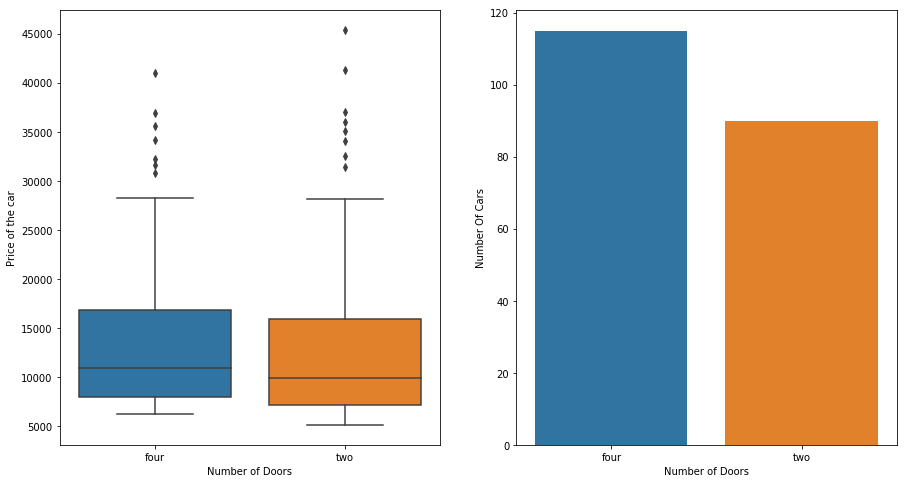

In [20]:
#Door number

plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice, order=['four', 'two']).set(xlabel="Number of Doors", ylabel="Price of the car")

plt.subplot(122)
df = carprice['doornumber'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Number of Doors", ylabel="Number Of Cars")

plt.show()

#Analysis for number of door type variable

From the above plots we can see that there is no significant difference b/w the median price of Two and Four door cars and its demand is also similar.

Hence, Number of Doors is not a significant feature impacting the price of the cars.



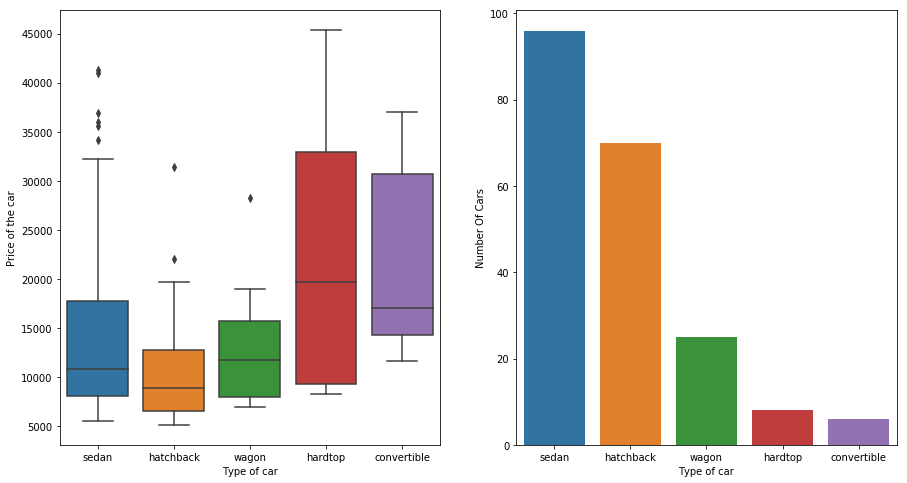

In [21]:
# Car body

plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.boxplot(x = 'carbody', y = 'price', data = carprice, order=['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible']).set(xlabel="Type of car", ylabel="Price of the car")
plt.subplot(122)
df = carprice['carbody'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Type of car", ylabel="Number Of Cars")

plt.show()

Analysis for Type of Car variable:
We can see that there is very high demand for sedan, hatchback, and wagon cars whose price range is less than 12.5K USD.

Hence, Type of car seems to be a significant feature impacting the price of the cars.

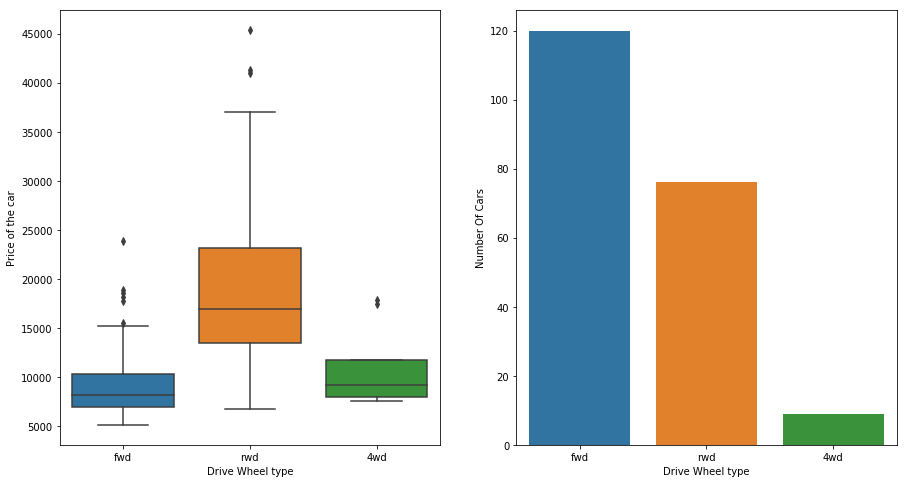

In [22]:
#Drive wheel type
plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice, order=['fwd', 'rwd', '4wd']).set(xlabel="Drive Wheel type", ylabel="Price of the car")
plt.subplot(122)
df = carprice['drivewheel'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Drive Wheel type", ylabel="Number Of Cars")

plt.show()

Analysis of Drive Wheel Type
From above plot we can see that there is high demand for front wheel and rear wheel drive cars whose median price range is less than lowest among other two type of wheel drives.

Hence, Type of car is a significant feature impacting the price of the cars.

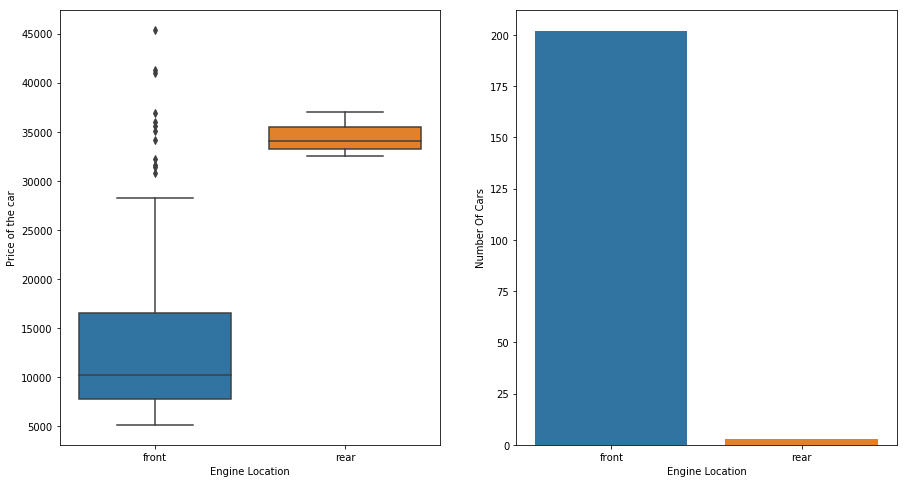

In [23]:
#Engine location

plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice, order=['front', 'rear']).set(xlabel="Engine Location", ylabel="Price of the car")
plt.subplot(122)
df = carprice['enginelocation'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Engine Location", ylabel="Number Of Cars")

plt.show()

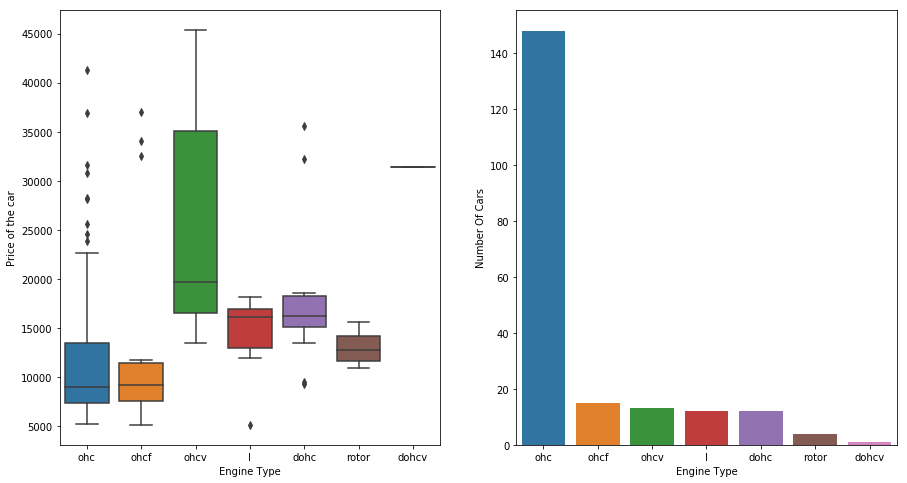

In [24]:
#Engine Type

plt.figure(figsize=(15,8))

plt.subplot(121)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice, order=['ohc', 'ohcf', 'ohcv', 'l', 'dohc', 'rotor', 'dohcv']).set(xlabel="Engine Type", ylabel="Price of the car")
plt.subplot(122)
df = carprice['enginetype'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Engine Type", ylabel="Number Of Cars")

plt.show()

Analysis for Engine Type  and location variable:

Here we can see that there are very high number for cars with OHC engine as the car with it has a low price. Same goes with front engine location 

Hence, Engine Type  and Engine location seems to be a significant feature for predicting the price of the cars.

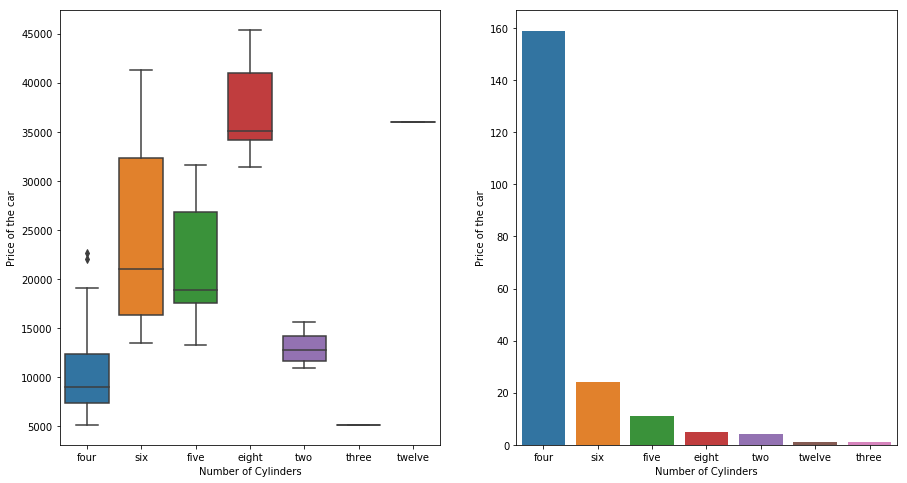

In [25]:
#Cylinder number
plt.figure(figsize=(15, 8))

plt.subplot(121)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice, order=['four', 'six', 'five', 'eight', 'two', 'three', 'twelve']).set(xlabel="Number of Cylinders", ylabel="Price of the car")
plt.subplot(122)
df = carprice['cylindernumber'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Number of Cylinders", ylabel="Price of the car")

plt.show()

Analysis for Number of Cylinders variable:

Here we can see that there is very high demand for four cylindered engine as the car with it has a low price.

Hence, Number of cylinders seems to be a significant feature for predicting the price of the cars.

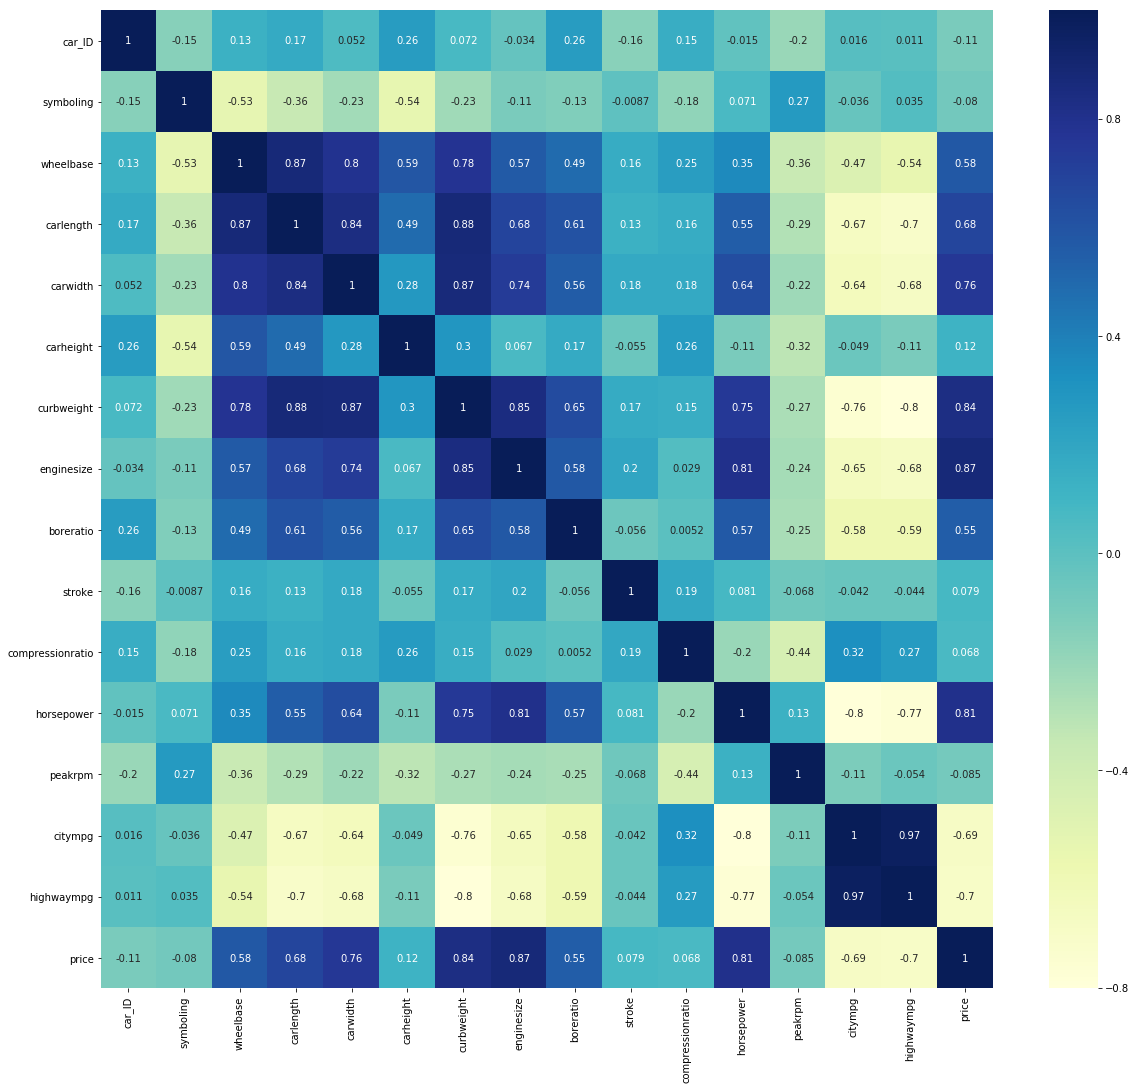

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 18))
sns.heatmap(carprice.corr(), annot = True, cmap="YlGnBu")
plt.show()

Curbweight is having multicollinearity affects with carlength ,carwidth, enginesize, wheelbase, horsepower, wheelbase, boreratio, citympg (negative) and highwaympg(negative)

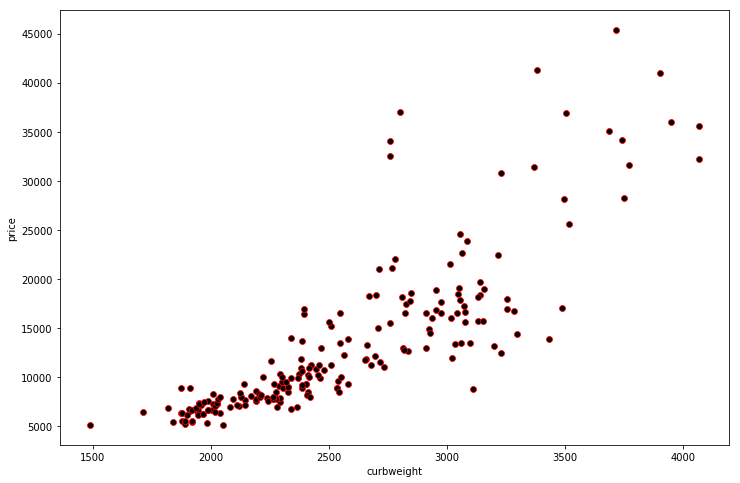

In [27]:
#Scatter Plot showing price and curbweight
plt.figure(figsize = (12,8))
sns.scatterplot(x='curbweight',y='price',data = carprice, edgecolor = 'red', color = 'black')

In [28]:
#Converting price into log terms to get clear view of the plot

carprice['log_price']=np.log10(carprice.price)

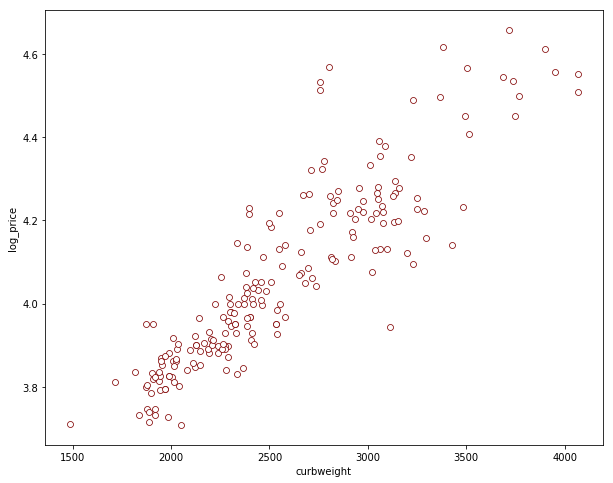

In [29]:
#Scatter Plot showing price(log) and curbweight
plt.figure(figsize = (10,8))
sns.scatterplot(x='curbweight',y='log_price',data=carprice, edgecolor = 'maroon', color = 'white')

We can see that car price and curbweight are closely correlated

In [30]:
# Dropping Price column
carprice = carprice.drop(columns=['price'])
carprice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CompanyName,model,log_price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,alfa-romero,giulia,4.130173
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,alfa-romero,stelvio,4.217484
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,alfa-romero,Quadrifoglio,4.217484
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,audi,100 ls,4.144574
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,audi,100ls,4.241795


# DATA PREPARATION

In [31]:
variablelist =  ['fueltype', 'enginelocation', 'aspiration', 'doornumber']

def binary_map(x):
    return x.map({'gas': 1, 'diesel': 0, 'front':1, 'rear':0, 'std':1, 'turbo':0, 'four':1, 'two':0})

carprice[variablelist] = carprice[variablelist].apply(binary_map)

In [32]:
carprice.shape

(205, 27)

# Getting dummy variables
Grouping the variables and store these categorical variables in a newly created dummy variables.

In [33]:
dummy = pd.get_dummies(carprice['carbody'], drop_first = True)
carprice = pd.concat([carprice, dummy], axis = 1)
carprice.drop(['carbody'], axis = 1, inplace = True)

In [34]:
dummy = pd.get_dummies(carprice['drivewheel'], drop_first = True)
carprice = pd.concat([carprice, dummy], axis = 1)
carprice.drop(['drivewheel'], axis = 1, inplace = True)

In [35]:
dummy = pd.get_dummies(carprice['enginetype'], drop_first = True)
carprice = pd.concat([carprice, dummy], axis = 1)
carprice.drop(['enginetype'], axis = 1, inplace = True)

In [36]:
dummy = pd.get_dummies(carprice['cylindernumber'], drop_first = True)
carprice = pd.concat([carprice, dummy], axis = 1)
carprice.drop(['cylindernumber'], axis = 1, inplace = True)

In [37]:
dummy = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
carprice = pd.concat([carprice, dummy], axis = 1)
carprice.drop(['fuelsystem'], axis = 1, inplace = True)

In [38]:
dummy = pd.get_dummies(carprice['CompanyName'], drop_first = True)
carprice = pd.concat([carprice, dummy], axis = 1)
carprice.drop(['CompanyName'], axis = 1, inplace = True)

In [39]:
carprice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [40]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
model               203 non-null object
log_price           205 non-null float64
hardtop             205 non-null uint8
hatchback           

In [41]:
# Dropping model and car_ID as they've no significance for this analysis
carprice = carprice.drop(columns=['car_ID','model'])
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


# Derived Metric

From domain knowledge it is known that power to weight ratio impacts price. Vehicles with a higher power to weight ratios are performance vehicles and will therefore be priced at higher rates.¶

In [42]:
#Creating Power to weight ratio derived metric column
carprice['pwr_wt_ratio']=carprice['horsepower']/carprice['curbweight']
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,pwr_wt_ratio
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0.043564
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0.043564
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0.054552
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0.043646
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0.040722


# Train-Test Split and feature scaling

In [43]:
#Splitting train and test data using sklearn.model_selection's train_test_split
from sklearn.model_selection import train_test_split
carprice_train, carprice_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

# RESCALING THE FEATURES
As we know that scaling doesn't impact model. Here we can see that except for peakrpm, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.



In [44]:
#Scaling variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
type(carprice_train.columns)

pandas.core.indexes.base.Index

In [45]:
df = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','log_price','pwr_wt_ratio']
carprice_train[df]=scaler.fit_transform(carprice_train[df])

In [46]:
carprice_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,pwr_wt_ratio
122,0.6,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,1,0,0,0,0,0,0,0,0.169146
125,1.0,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,1,0,0,0,0,0,0,0.480607
166,0.6,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,1,0,0,0.438242
1,1.0,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,0,0,0.360040
199,0.2,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,0,1,0.478148


In [47]:
carprice_train.shape

(143, 66)

In [48]:
carprice_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,pwr_wt_ratio
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.301305
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.139794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218294
50%,0.600000,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268725
75%,0.600000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360401
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Creating dependant and independant data
y_train = carprice_train.pop('log_price')
X_train = carprice_train

# MODEL BUILDING

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with and getting top 10 affecting variables
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)  
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 43),
 ('fueltype', False, 2),
 ('aspiration', False, 25),
 ('doornumber', False, 51),
 ('enginelocation', True, 1),
 ('wheelbase', False, 20),
 ('carlength', False, 31),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 10),
 ('boreratio', False, 6),
 ('stroke', False, 44),
 ('compressionratio', False, 3),
 ('horsepower', False, 24),
 ('peakrpm', False, 26),
 ('citympg', True, 1),
 ('highwaympg', False, 17),
 ('hardtop', False, 33),
 ('hatchback', False, 32),
 ('sedan', False, 34),
 ('wagon', False, 35),
 ('fwd', False, 36),
 ('rwd', False, 39),
 ('dohcv', False, 45),
 ('l', False, 28),
 ('ohc', False, 22),
 ('ohcf', False, 18),
 ('ohcv', False, 53),
 ('rotor', False, 15),
 ('five', False, 12),
 ('four', False, 14),
 ('six', False, 37),
 ('three', True, 1),
 ('twelve', False, 11),
 ('two', False, 13),
 ('2bbl', False, 49),
 ('4bbl', False, 23),
 ('idi', False, 5),
 ('mfi', False, 46),
 ('mpfi', False, 41),
 ('spdi', 

In [53]:
# Checking for variables obtained with rfe and later the variables removed with rfe 
rfe_column = X_train.columns[rfe.support_]
rfe_column


Index(['enginelocation', 'carwidth', 'carheight', 'curbweight', 'citympg',
       'three', 'bmw', 'mitsubishi', 'saab', 'volvo'],
      dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_column]

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [56]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [57]:
# Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     165.3
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           1.49e-69
Time:                        14:34:11   Log-Likelihood:                 185.62
No. Observations:                 143   AIC:                            -349.2
Df Residuals:                     132   BIC:                            -316.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5005      0.073      6.

In [58]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carwidth,32.89
0,enginelocation,31.77
3,curbweight,27.76
4,citympg,11.46
2,carheight,9.25
7,mitsubishi,1.17
6,bmw,1.14
9,volvo,1.14
5,three,1.12
8,saab,1.09


# Model1

In [59]:
# Dropping insignificant column
X_train1 = X_train_rfe.drop(['three'], axis = 1)

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train1)

In [61]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [62]:
#Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           6.75e-70
Time:                        14:34:16   Log-Likelihood:                 183.63
No. Observations:                 143   AIC:                            -347.3
Df Residuals:                     133   BIC:                            -317.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4963      0.074      6.

In [63]:
#Checking VIF 
X_train1 = X_train_lm.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carwidth,32.24
0,enginelocation,31.60
3,curbweight,27.13
4,citympg,10.85
2,carheight,9.23
6,mitsubishi,1.17
5,bmw,1.14
8,volvo,1.14
7,saab,1.09


# MODEL 2

In [64]:
X_train2 = X_train1.drop(['citympg'], axis = 1)  #droping citympg because of high p value

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train2)

In [66]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [67]:
#Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           1.36e-70
Time:                        14:34:20   Log-Likelihood:                 182.46
No. Observations:                 143   AIC:                            -346.9
Df Residuals:                     134   BIC:                            -320.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4676      0.072      6.

In [68]:
X_train2 = X_train_lm.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carwidth,32.18
3,curbweight,21.52
0,enginelocation,12.41
2,carheight,8.23
5,mitsubishi,1.17
7,volvo,1.14
4,bmw,1.11
6,saab,1.05


# MODEL 3

In [69]:
X_train3 = X_train2.drop(['saab'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train3)
lm = sm.OLS(y_train,X_train_lm).fit()  

In [70]:
#Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           3.53e-70
Time:                        14:34:23   Log-Likelihood:                 178.51
No. Observations:                 143   AIC:                            -341.0
Df Residuals:                     135   BIC:                            -317.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4619      0.073      6.

In [71]:
X_train3 = X_train_lm.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carwidth,32.17
3,curbweight,21.50
0,enginelocation,12.34
2,carheight,8.04
5,mitsubishi,1.17
6,volvo,1.13
4,bmw,1.11


# MODEL 4

In [72]:
X_train4 = X_train3.drop(['volvo'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train4)
lm = sm.OLS(y_train,X_train_lm).fit()  

In [73]:
#Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     242.3
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           4.91e-70
Time:                        14:34:28   Log-Likelihood:                 175.20
No. Observations:                 143   AIC:                            -336.4
Df Residuals:                     136   BIC:                            -315.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4513      0.075      6.

In [74]:
X_train4 = X_train_lm.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carwidth,32.03
3,curbweight,21.49
0,enginelocation,11.96
2,carheight,7.82
5,mitsubishi,1.17
4,bmw,1.10


# MODEL 5

In [75]:
X_train5 = X_train4.drop(['carwidth'], axis = 1) # dropping carwidth as it has high VIF value
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train5)
lm = sm.OLS(y_train,X_train_lm).fit() 

In [76]:
#Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     233.3
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           3.56e-65
Time:                        14:34:31   Log-Likelihood:                 160.46
No. Observations:                 143   AIC:                            -308.9
Df Residuals:                     137   BIC:                            -291.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4552      0.082      5.

In [77]:
X_train5 = X_train_lm.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,enginelocation,9.14
1,carheight,7.82
2,curbweight,5.11
4,mitsubishi,1.17
3,bmw,1.08


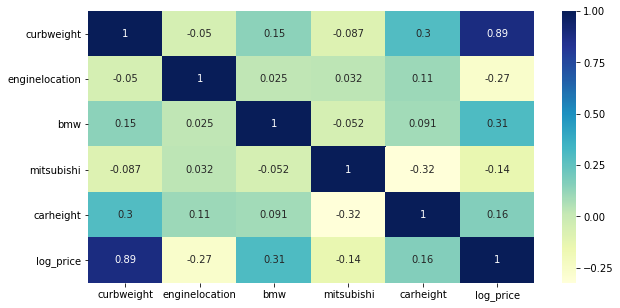

In [78]:
#heat map to decide to whether to drop enginelocation or carheight
plt.figure(figsize = (10, 5))
sns.heatmap(carprice[['curbweight','enginelocation','bmw','mitsubishi','carheight','log_price']].corr(), annot = True, cmap='YlGnBu')
plt.show()

Looking at the heat map as the relation of log_price is higher with enginelocation than carHeight. It is decided to drop engineLocation

# MODEL 6

In [79]:
X_train6 = X_train5.drop(['enginelocation'], axis = 1)
# Adding a constant variable
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train6)
lm = sm.OLS(y_train,X_train_lm).fit() 

In [80]:
#Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     240.9
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           3.45e-61
Time:                        14:34:50   Log-Likelihood:                 147.92
No. Observations:                 143   AIC:                            -285.8
Df Residuals:                     138   BIC:                            -271.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0465      0.023      2.062      0.0

In [81]:
X_train6 = X_train_lm.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,curbweight,4.22
0,carheight,4.07
2,bmw,1.07
3,mitsubishi,1.05


# The values of VIFs of curbweight, carHeight,bmw and mitsubishi are less than 5 and the values of p of first 3 are 0 and mitsubishi is 0.001(close to 0). Therefore all these are significant to predict the price of the car in USA

In [82]:
X_train6.shape

(143, 4)

In [83]:
y_train_price = lm.predict(X_train_lm)

Text(0,0.5,'Views')

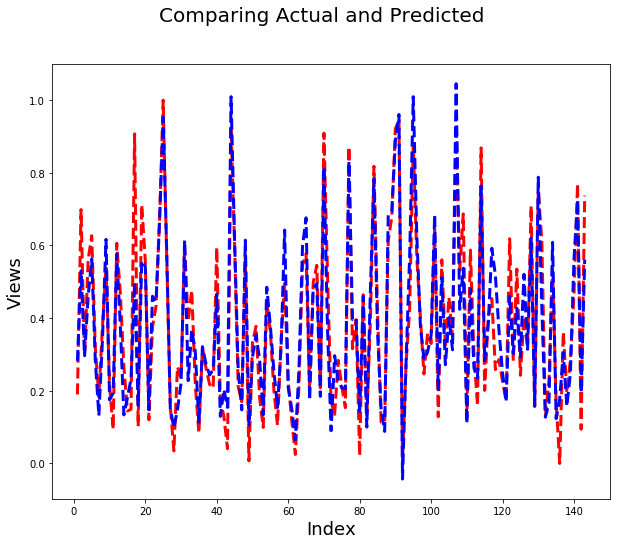

In [84]:
#Actual vs Predicted
c = [i for i in range(1,144,1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c,y_train, color='red', linewidth=3, linestyle="--")
plt.plot(c,y_train_price, color="blue",  linewidth=3, linestyle="--")
fig.suptitle('Comparing Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Views', fontsize=18) 

# Residual Analysis of Model

Text(0.5,0,'Errors')

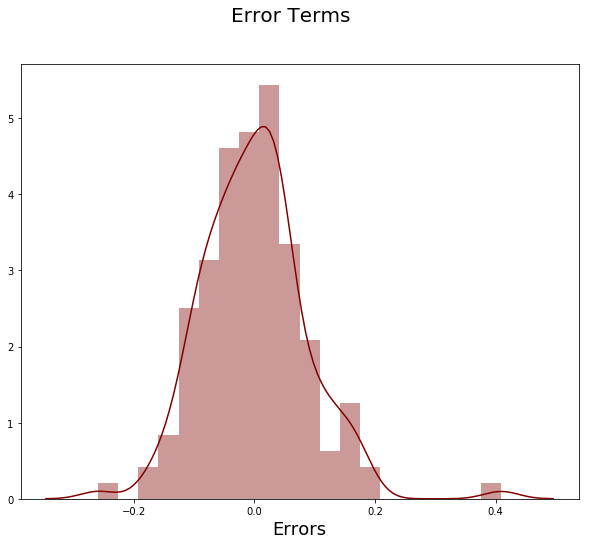

In [85]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,8))
sns.distplot((y_train - y_train_price), bins = 20, color = 'maroon')
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [86]:
carprice_test[df]=scaler.transform(carprice_test[df])

In [87]:
y_test = carprice_test.pop('log_price')
X_test = carprice_test

# Prediction and Evaluation

In [88]:
# Predicting
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train6.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [89]:
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

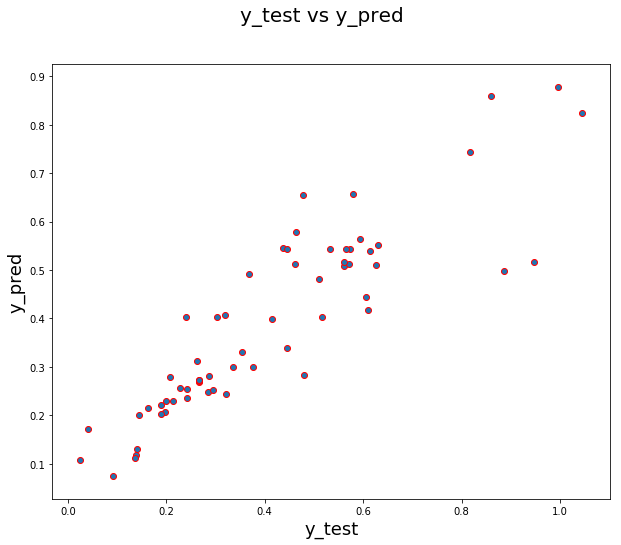

In [90]:
# Plotting y_test and y_pred to know the spread.
fig = plt.figure(figsize = (10,8))
plt.scatter(y_test,y_pred, edgecolor = 'red')
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18) 

In [91]:
from sklearn.metrics import r2_score 
round(r2_score(y_test, y_pred),2)

0.78

Text(0,0.5,'Views')

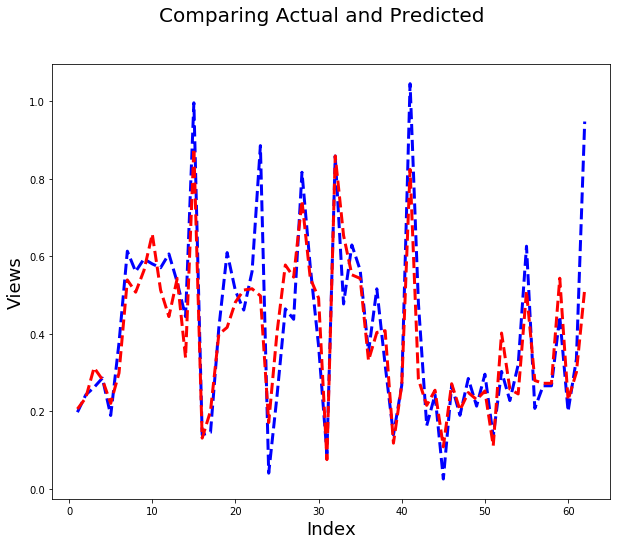

In [92]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c,y_test, color='blue', linewidth=3, linestyle="--")
plt.plot(c,y_pred, color='red',  linewidth=3, linestyle="--")
fig.suptitle('Comparing Actual and Predicted', fontsize=20)  
plt.xlabel('Index', fontsize=18)                            
plt.ylabel('Views', fontsize=18)      

In [93]:
from sklearn.metrics import r2_score

In [94]:
round(r2_score(y_train, y_train_price),2)

0.87

In [95]:
round(r2_score(y_test, y_pred),2)

0.78

The training set has the model efficiency of 87% and test set has model effieciency of 78%

# Conclusion:
- It has been observed that curbweight is representing most of the features of the car. As there is change in curbweight it observed that there is noticable change in the price linearly.
- It was noted that curbweight, carheight and companies like bmw and mitsubishi area affecting the price of the car
- The price of the car in USA can be predicted using the following equation

# predicted price= (1.05 x curbweight) - (0.19 x carheight) + (0.24 x bmw) - (0.11 x mitsubishi) + const

1) R-sqaured and Adjusted R-squared (extent of fit) - 0.875 and 0.871 - 87% variance explained.

2) F-stats and Prob(F-stats) (overall model fit) - 240.9 and 3.45e-61(approx. 0.0) - Model fir is significant and explained 87% variance is just not by chance.

3) p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.